Here is implementation of simulated annealing for linear regression. Let's do this!

At first, we need toimport all nessesory modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The following function generate linear dataset with given maximal bias. That means the dataset represent approximate values for function:

`Y = a * X + b` 

with bias in range <pre>[-max_bias, max_bias]</pre>

In [2]:
def generate_linear_dataset(a, b, size, max_bias=1.0):
    X = np.arange(size)
    Y = [a * x + b  + (np.random.rand() - 0.5) * 2 * max_bias for x in X]
    dataset = pd.DataFrame({
        'X': X,
        'Y': Y
    })
    return dataset

Let's generate dataset and visualize it

   X          Y
0  0  12.938631
1  1  11.555299
2  2   3.698215
3  3  -0.180725
4  4  -0.140114
5  5  12.547261
6  6   3.080368
7  7   8.839731
8  8  -6.360577
9  9  10.859543


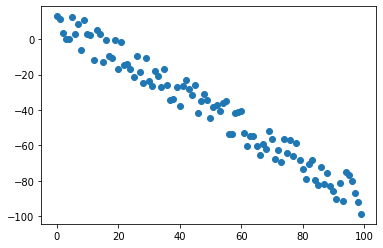

In [3]:
a, b = -1, 10
dataset = generate_linear_dataset(a=a, b=b, size=100, max_bias=10.0)
print(dataset[0:10])
plt.plot(dataset['Y'], linestyle=' ', marker='o')
plt.show()

The function below represent squered error for a given dataset. It is calculated using comparison with outputs of actual linear function. Then goes normalization by size of dataset

In [4]:
def error(a, b, dataset: pd.DataFrame):
    func = lambda x: a * x + b
    e = 0
    for idx, (x, y) in dataset.iterrows():
        e += (y - func(x)) ** 2
    return e / len(dataset)

In [5]:
error(a, b, dataset)

35.55656169871116

Now goes random initialization of values a and b. We will start with this values

In [6]:
a_orig = np.random.rand() * 0.5
b_orig = np.random.rand() * 0.5

The idea behind simulated annealing is to update our parameters randomly within given range. This range is called temperature (T). If new value has lower enegry then the current one then we set it as current. Else we choose randomly if we need to set it as current or not.

The function below update parameters.

In [7]:
def update(a, b, dataset, T, error_estimator, random_chance=0.2):
    # updating a
    bias_a = (np.random.rand() - 0.5) * 2 * T
    new_a = a + bias_a
    if error_estimator(new_a, b, dataset) < error_estimator(a, b, dataset):
        a = new_a
    else:
        if np.random.rand() < random_chance:
            a = new_a
    
    # updating b
    bias_b = (np.random.rand() - 0.5) * 2 * T
    new_b = b + bias_b
    if error_estimator(a, new_b, dataset) < error_estimator(a, b, dataset):
        b = new_b
    else:
        if np.random.rand() < random_chance:
            b = new_b
    
    return a, b

Let's now implement the main loop of our algorithm. 

Result: 3986.035 -> 49.323


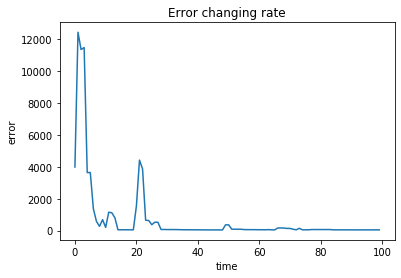

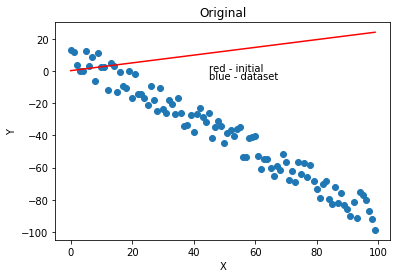

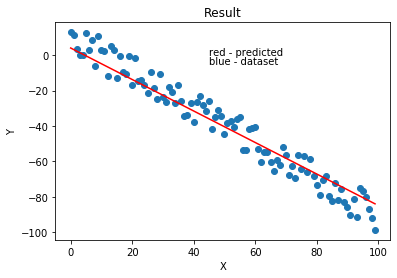

In [8]:
T = 1.
error_line = []
min_error = error(a, b, dataset)
a_cur, b_cur = a_orig, b_orig
while T > 0:
    error_line.append(error(a_cur, b_cur, dataset))
    if error_line[-1] < min_error:
        min_error = error_line[-1]
        # print('Min error: {:.2f}'.format(error_line[-1]))
    a_cur, b_cur = update(a_cur, b_cur, dataset, T, error)
    T -= .01

print('Result: {:.3f} -> {:.3f}'.format(error_line[0], error_line[-1]))

plt.close()
plt.xlabel('time')
plt.ylabel('error')
plt.title('Error changing rate')
plt.plot(error_line)
plt.show()

plt.close()
Y = [a_orig * x + b_orig for x in range(len(dataset))]
plt.plot(dataset['Y'], marker='o', linestyle=' ')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original')
plt.text(45, 0, 'red - initial')
plt.text(45, -5, 'blue - dataset')
plt.plot(Y, color='red')
plt.show()

plt.close()
Y = [a_cur * x + b_cur for x in range(len(dataset))]
plt.plot(dataset['Y'], marker='o', linestyle=' ')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Result')
plt.text(45, 0, 'red - predicted')
plt.text(45, -5, 'blue - dataset')
plt.plot(Y, color='red')
plt.show()